In [2]:
from generate_attestations import *

num_wallets = 10
wallet_addresses = generate_wallet_addresses(num_wallets)
attestations = generate_attestations(10,wallet_addresses=wallet_addresses)


In [6]:
attestations[0].attester
wallet_addresses[attestations[0].attester]

{'role': 'dishonest',
 'is_human': False,
 'is_bot': True,
 'creditworthiness': 89}

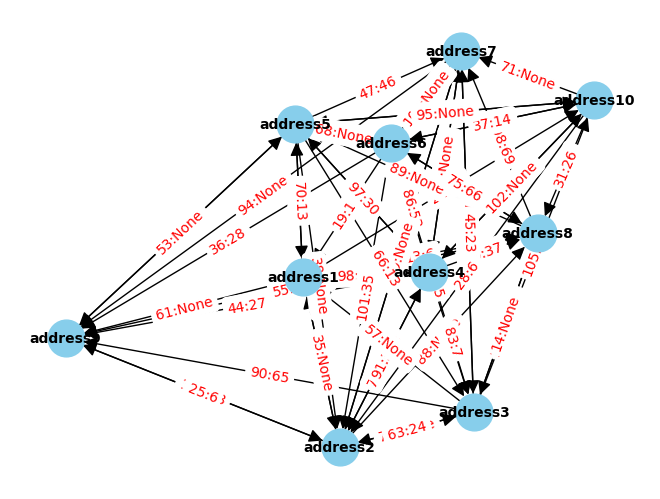

In [8]:
from graphing import *
import networkx as nx
import matplotlib.pyplot as plt

G = create_network_graph(wallet_addresses,attestations)
draw_network_graph(G)

In [15]:
from main import *

linked_attestations = find_linked_attestations_for_identity(attestations,'address1')

print(linked_attestations[0].uid)

9


In [23]:
from calc_trust import *
from generate_attestations import *

num_wallets = 3
wallet_addresses = generate_wallet_addresses(num_wallets)
attestations = []
attestations = generate_attestations(5,wallet_addresses=wallet_addresses, attestations=attestations)
updated_attestations = calculate_trust(attestations,wallet_addresses)
for attestation in updated_attestations:   
    print(attestation.Tc)

Tc for claim is_bot Tc: 0.054597883249256296
Tc for claim 1 Tc: 0.0
Tc for claim 1 Tc: 0.02768209069731531
Tc for claim 3 Tc: 0.0
Tc for claim is_bot Tc: 0.0
Tc for third attestation Tc: {'1': 0.05536418139463062}
Tc for claim is_bot Tc: 0.1550136155874865
Tc for claim 1 Tc: 0.0
Tc for claim 1 Tc: 0.054597883249256296
Tc for claim 3 Tc: 0.0
Tc for claim is_bot Tc: 0.0
Tc for third attestation Tc: {'1': 0.21992412928777383}
Tc for claim is_bot Tc: 0.1550136155874865
Tc for claim 1 Tc: 0.0
Tc for claim 1 Tc: 0.054597883249256296
Tc for claim 3 Tc: 0.0
Tc for claim is_bot Tc: 0.0
Tc for third attestation Tc: {'1': 0.5490440250740602}
Tc for claim is_bot Tc: 0.1550136155874865
Tc for claim 1 Tc: 0.0
Tc for claim 1 Tc: 0.054597883249256296
Tc for claim 3 Tc: 0.0
Tc for claim is_bot Tc: 0.0
Tc for third attestation Tc: {'1': 1.207283816646633}
Tc for claim is_bot Tc: 0.1550136155874865
Tc for claim 1 Tc: 0.0
Tc for claim 1 Tc: 0.054597883249256296
Tc for claim 3 Tc: 0.0
Tc for claim is_bot T

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_network_graph(wallet_addresses, attestations, selected_claim):
    G = nx.DiGraph()  # Directed graph, as attestations are directed from attester to recipient
    
    # Filter attestations based on the selected claim
    filtered_attestations = [attestation for attestation in attestations if selected_claim in attestation.data.keys()]
    
    # Add nodes for wallet addresses
    for address, properties in wallet_addresses.items():
        color = 'blue' if properties['role'] == 'honest' else 'red'
        
        # Find associated attestations for this address and selected claim
        associated_attestations = [attestation for attestation in filtered_attestations if attestation.attester == address or attestation.recipient == address]
        
        if not associated_attestations:  # Skip if no associated attestations for this address and claim
            continue
        
        # Assuming each address has at least one associated attestation
        associated_attestation = associated_attestations[0]
        G.add_node(address, color=color, role=properties['role'], label=f"{address}\n{associated_attestation.Ti_attester if associated_attestation.attester == address else associated_attestation.Ti_recipient}")
        
    # Add nodes for attestations and edges from attester to attestation and from attestation to recipient
    for attestation in filtered_attestations:
        G.add_node(attestation.uid, color='green', role='attestation', label=f"{attestation.uid}\n{attestation.Tc}")
        G.add_edge(attestation.attester, attestation.uid, role='attester_to_attestation')
        if attestation.recipient:  # If there is a recipient, add edge from attestation to recipient
            G.add_edge(attestation.uid, attestation.recipient, role='attestation_to_recipient')
    
    return G



def draw_network_graph(G):
    pos = nx.spring_layout(G)
    colors = [node[1]['color'] for node in G.nodes(data=True)]
    labels = {node: data['label'] for node, data in G.nodes(data=True)}
    
    nx.draw(G, pos, node_color=colors, with_labels=False)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, verticalalignment='center_baseline')
    plt.show()

# Assuming wallet_addresses and attestations are already defined
selected_claim = "is_human"  # Or any other claim you want to visualize
G = create_network_graph(wallet_addresses, attestations, selected_claim)
draw_network_graph(G)

selected_claim = "is_bot"  # Or any other claim you want to visualize
G = create_network_graph(wallet_addresses, attestations, selected_claim)
draw_network_graph(G)

selected_claim = "creditworthiness"  # Or any other claim you want to visualize
G = create_network_graph(wallet_addresses, attestations, selected_claim)
draw_network_graph(G)

In [25]:
updated_attestations[2].Tc

{'1': 428.66429515529927}

{'creditworthiness': 111.70726912797839}
{'1': 0.0}
{'2': 0.0}
{'creditworthiness': 223.41453825595678}
{'1': 0.0}
{'5': 0.05536418139463062}
{'4': 0.0}
{'2': 0.0}
{'6': 0.0}
{'4': 0.0}
